In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Riyaz\Desktop\K Means Cluster Problem_ Data Set.csv')

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
len(df['Unnamed: 0'].unique())

777

In [5]:
df.duplicated().value_counts()

False    777
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [130]:
df['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [8]:
X = df.drop(['Unnamed: 0', 'Private'], axis =1)

In [9]:
X.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
X.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<AxesSubplot:>

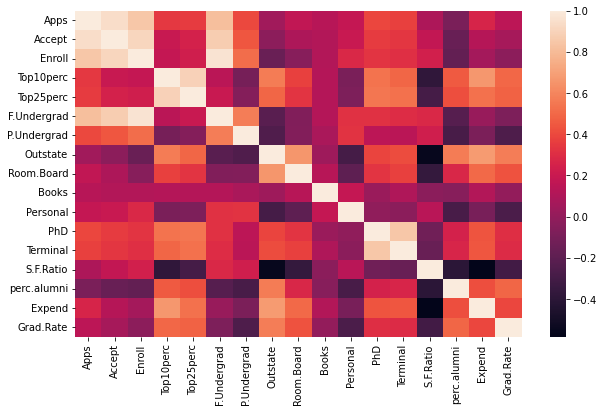

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr())

<Figure size 720x432 with 0 Axes>

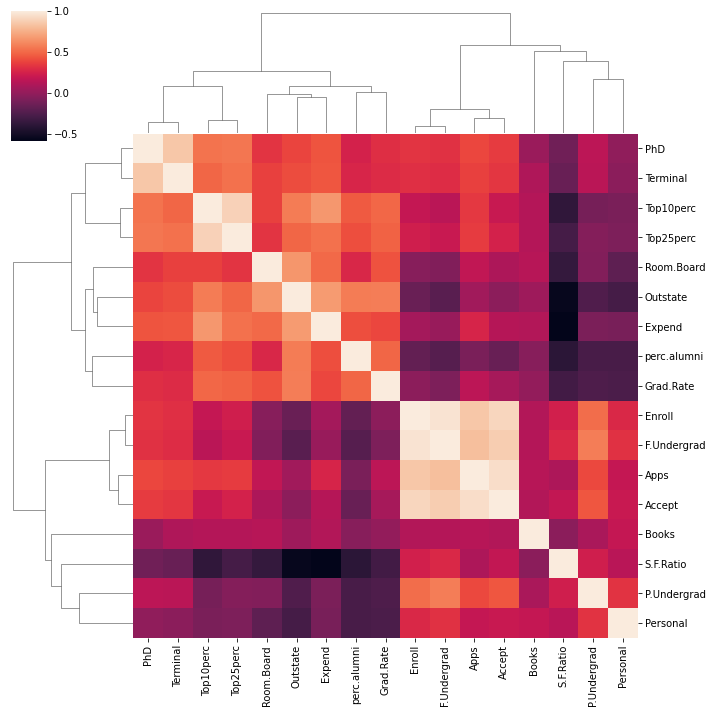

In [12]:
plt.figure(figsize=(10,6))
sns.clustermap(X.corr())

<AxesSubplot:xlabel='Apps', ylabel='Accept'>

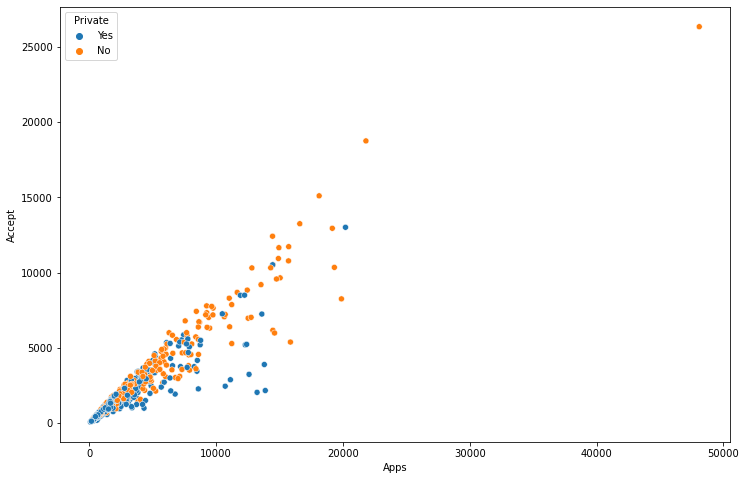

In [122]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Apps'], y = df['Accept'], hue = df['Private'])

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

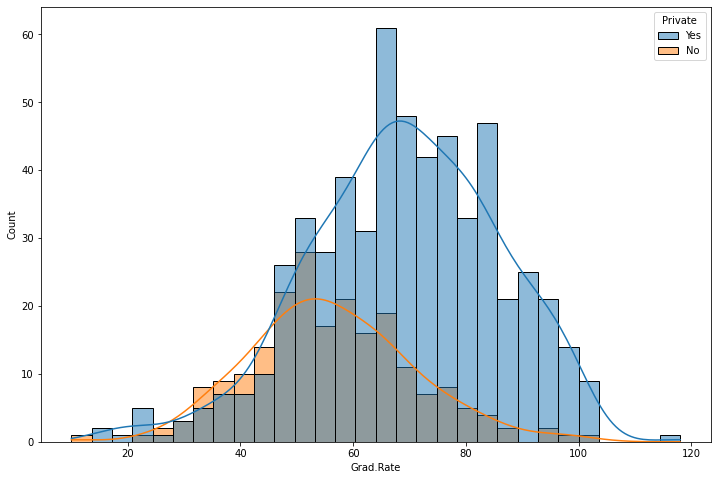

In [131]:
plt.figure(figsize=(12,8))
sns.histplot(x = df['Grad.Rate'], kde=True, hue = df['Private'], bins=30)

<AxesSubplot:xlabel='Outstate', ylabel='Count'>

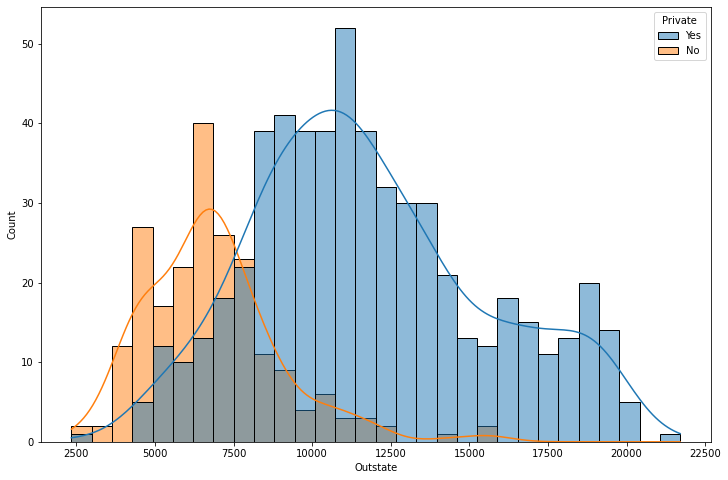

In [129]:
plt.figure(figsize=(12,8))
sns.histplot(x = df['Outstate'], kde=True, hue = df['Private'], bins=30)

<AxesSubplot:xlabel='Personal', ylabel='Count'>

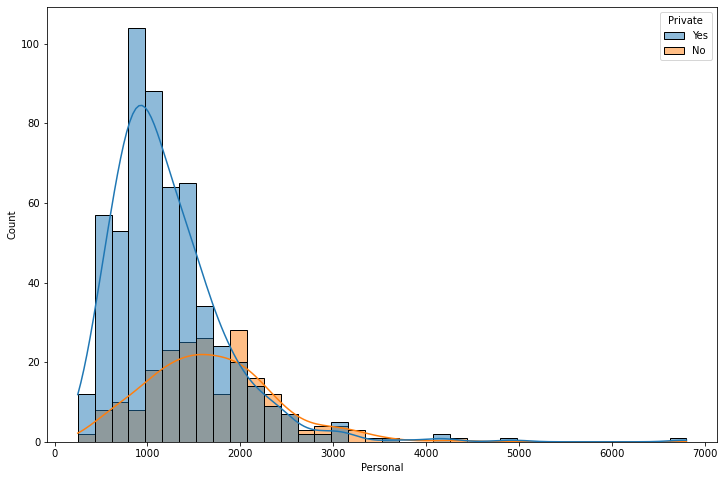

In [124]:
plt.figure(figsize=(12,8))
sns.histplot(x = df['Personal'], kde=True, hue = df['Private'])

<AxesSubplot:xlabel='S.F.Ratio', ylabel='Count'>

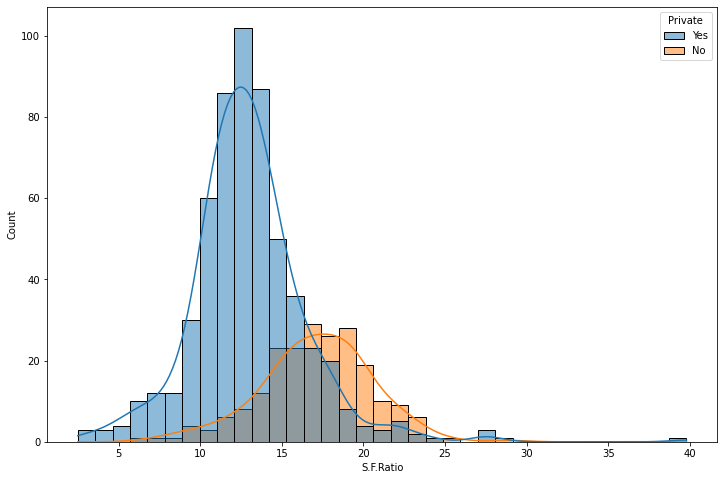

In [125]:
plt.figure(figsize=(12,8))
sns.histplot(x = df['S.F.Ratio'], kde=True, hue = df['Private'])

In [16]:
# sns.pairplot(df)

<AxesSubplot:xlabel='S.F.Ratio', ylabel='Outstate'>

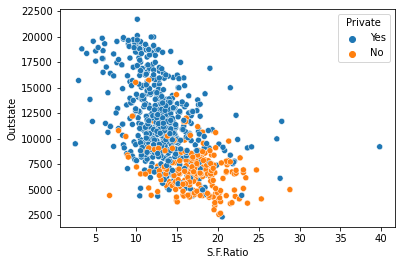

In [17]:
sns.scatterplot(data = df, x = 'S.F.Ratio', y = 'Outstate', hue='Private')

<AxesSubplot:xlabel='Personal', ylabel='Outstate'>

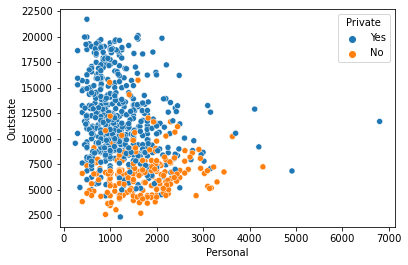

In [18]:
sns.scatterplot(data = df, x = 'Personal', y = 'Outstate', hue='Private')

In [19]:
df.isnull().sum().value_counts()

0    19
dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [22]:
scaled_X.shape

(777, 17)

In [23]:
scaled_X

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [24]:
from sklearn.cluster import KMeans

In [61]:
ssd = []
ssd_scale = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    model_scale = KMeans(n_clusters=k)
    
    model.fit(X)
    model_scale.fit(scaled_X)
    
    # Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    ssd_scale.append(model_scale.inertia_)

In [26]:
pd.Series(ssd).diff()

0             NaN
1    -2215.430958
2     -810.652759
3     -594.413975
4     -340.172634
5     -289.108859
6     -249.298122
7     -161.566552
8     -254.741920
9     -146.344469
10    -151.968817
11    -182.422693
12     -86.495820
13     -91.739528
14     -67.002244
15    -122.836128
16    -104.337648
17     -61.043301
18     -90.175592
19     -55.492030
20     -40.225706
21     -69.071383
22     -67.781599
23     -69.570741
24     -43.930508
25     -57.211770
26     -68.363279
27     -34.168458
dtype: float64

In [62]:
pd.Series(ssd_scale).diff()

0             NaN
1    -2215.430958
2     -810.652759
3     -593.901107
4     -342.095145
5     -288.408185
6     -219.498839
7     -212.219982
8     -223.019954
9     -126.540872
10    -226.339526
11    -114.132020
12    -108.752610
13    -126.702762
14     -73.118678
15     -72.597541
16    -106.940074
17     -48.685274
18     -71.312742
19     -92.936464
20     -56.895375
21     -46.925210
22    -100.212413
23     -35.097278
24     -42.257104
25     -42.274327
26     -63.933660
27     -32.273214
dtype: float64

Text(0, 0.5, ' Sum of Squared Distances')

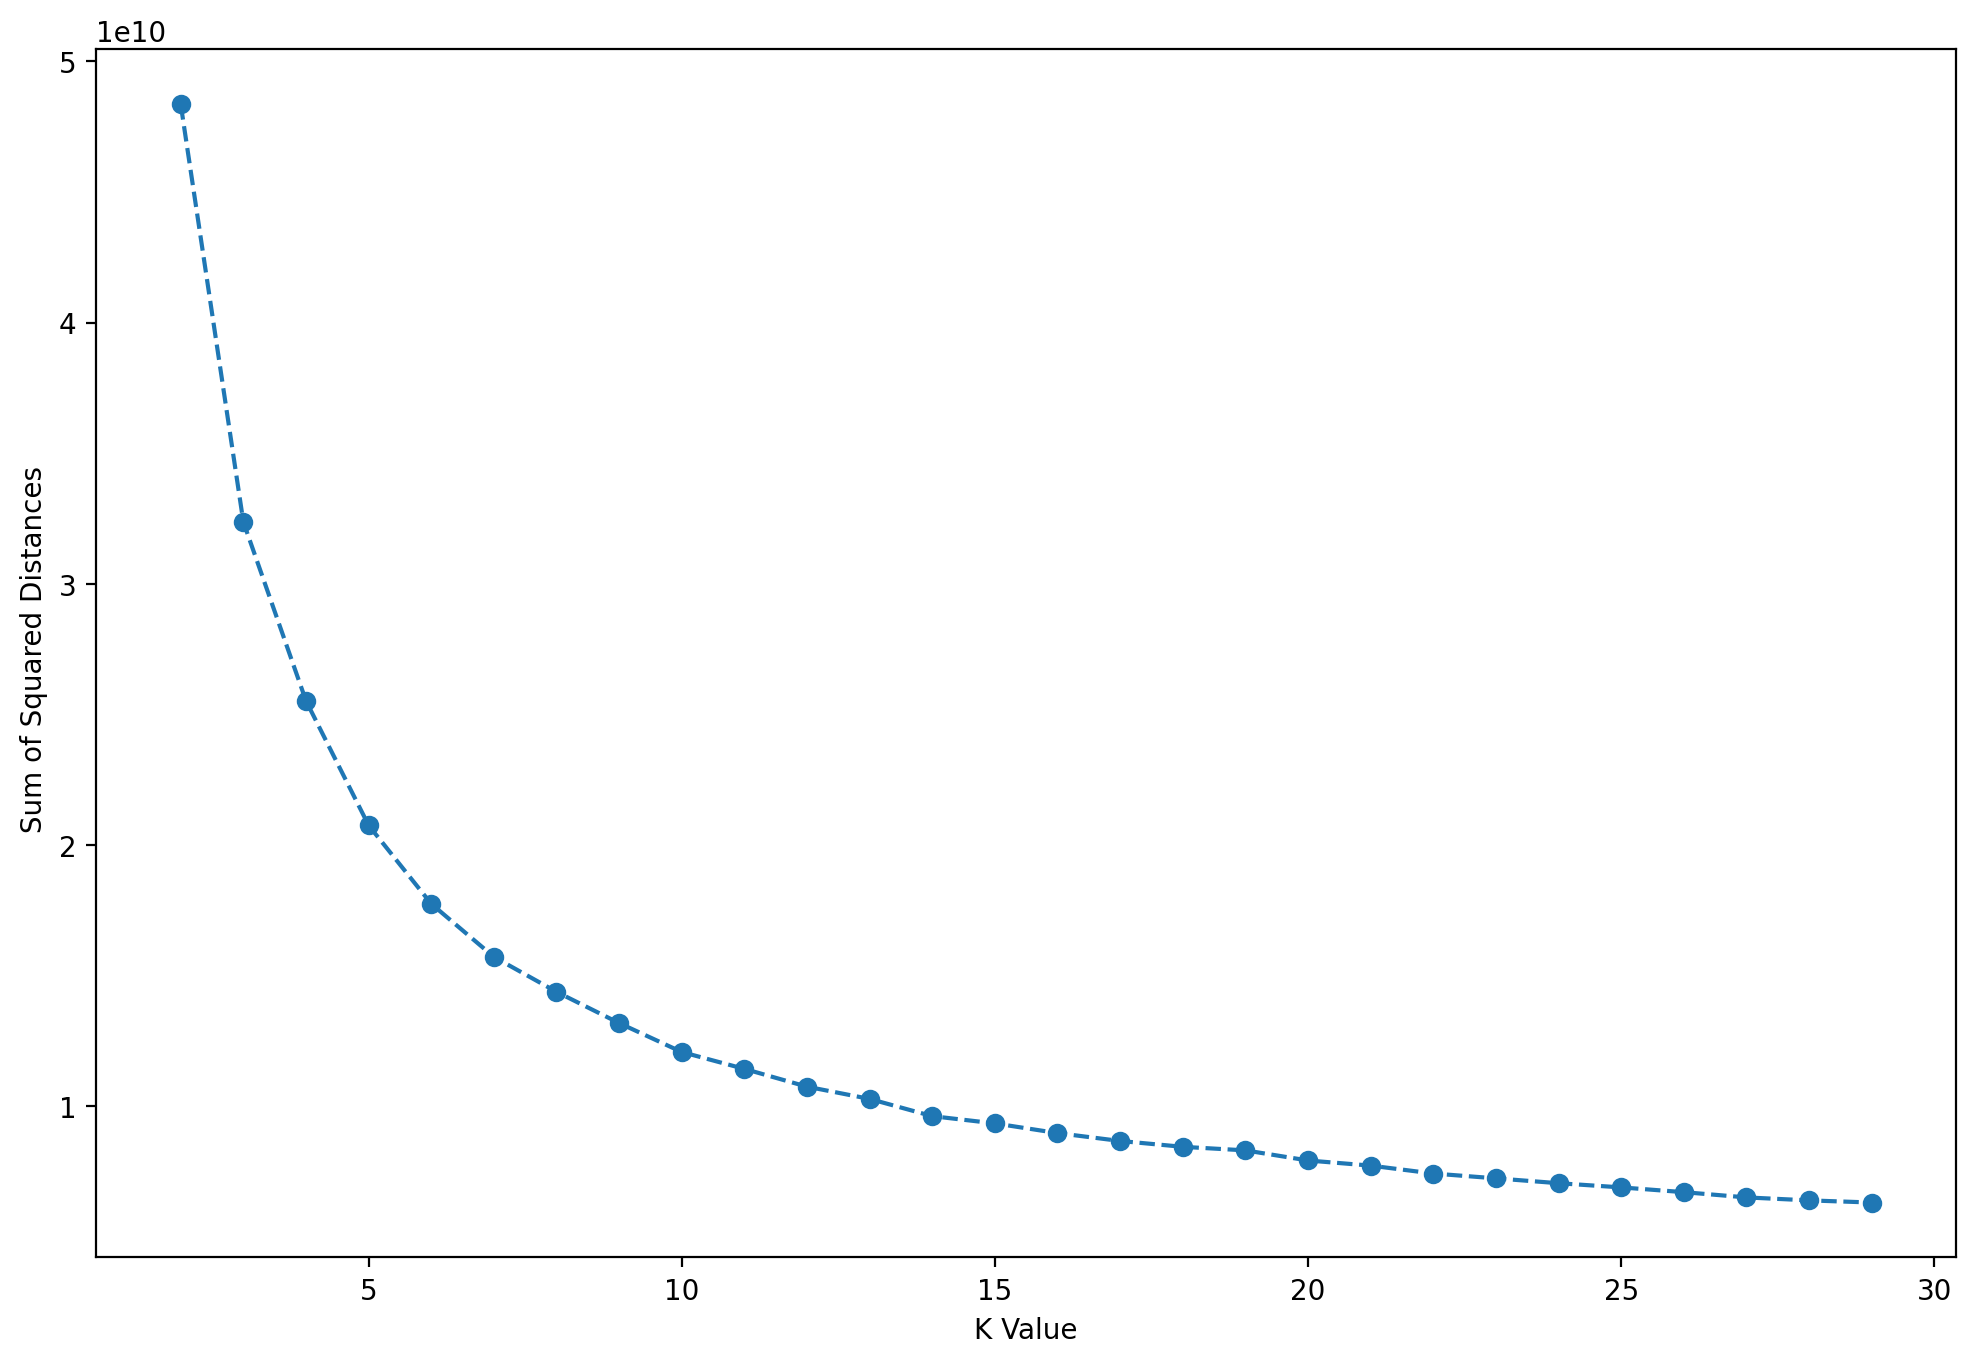

In [120]:
plt.figure(figsize=(12,8), dpi=200)
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Text(0, 0.5, ' Sum of Squared Distances')

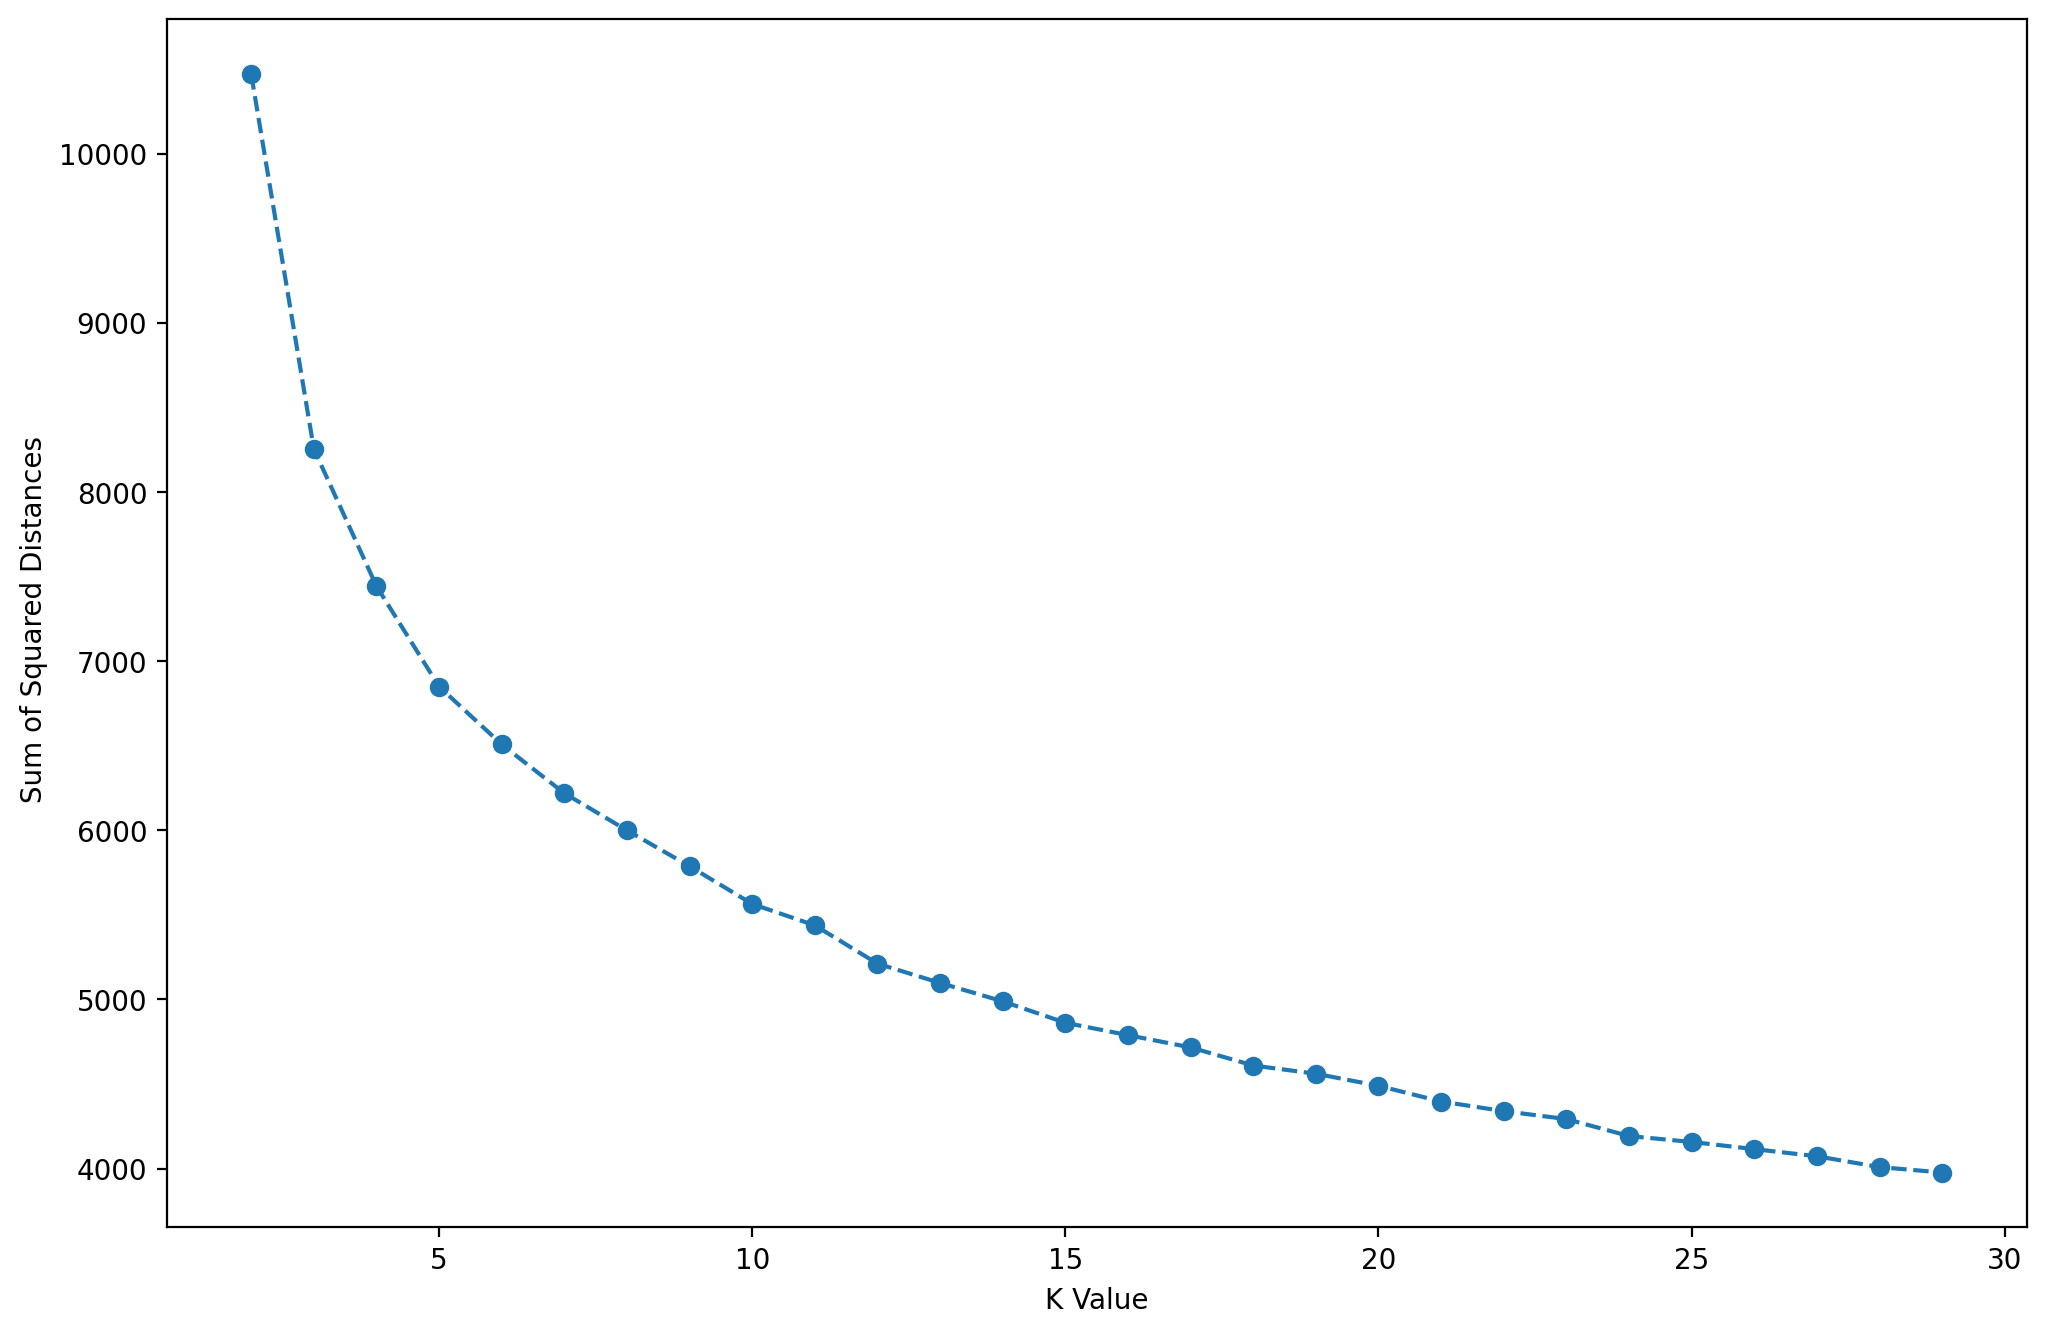

In [117]:
plt.figure(figsize=(12,8), dpi=200)
plt.plot(range(2,30),ssd_scale,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [67]:
model = KMeans(n_clusters=2)
model.fit(X)

model_scale = KMeans(n_clusters=2)
model_scale.fit(scaled_X)

# ypred = model.fit_predict(scaled_X)

KMeans(n_clusters=2)

In [68]:
# ypred

In [69]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
model_scale.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [72]:
X['K=2 Clusters'] = model.labels_ # or y_pred (ypred = model.fit_predict(scaled_X))
X['scale_k=2 Clusters'] = model_scale.labels_

In [73]:
X.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,K=2 Clusters,scale_k=2 Clusters
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,0
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0


In [74]:
df.iloc[:5]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [82]:
final = df[['Private']]

In [83]:
final = final.join(X['K=2 Clusters'])

In [84]:
final_scale = df[['Private']]

In [85]:
final_scale = final_scale.join(X['scale_k=2 Clusters'])

In [87]:
final.head(10)

,Private,K=2 Clusters
0,Yes,1
1,Yes,1
2,Yes,1
3,Yes,1
4,Yes,1
5,Yes,1
6,Yes,1
7,Yes,1
8,Yes,1
9,Yes,1


In [88]:
final_scale.head(10)

,Private,scale_k=2 Clusters
0,Yes,0
1,Yes,0
2,Yes,0
3,Yes,1
4,Yes,0
5,Yes,0
6,Yes,0
7,Yes,1
8,Yes,1
9,Yes,0


In [90]:
final.value_counts()

Private  K=2 Clusters
Yes      1               531
No       1               138
         0                74
Yes      0                34
dtype: int64

In [102]:
p = 531 / (531 + 34) # precesion

In [103]:
r = 531 / (531 + 138) # Recall

In [104]:
f1 = 2*p*r / (p+r)

In [105]:
p

0.9398230088495575

In [106]:
r

0.7937219730941704

In [107]:
f1

0.8606158833063209

In [108]:
final_scale.value_counts()

Private  scale_k=2 Clusters
Yes      0                     340
         1                     225
No       0                     145
         1                      67
dtype: int64

In [109]:
p_scale = 340 / (340 + 225) # precesion

In [110]:
r_scale = 340 / (340 + 145) # Recall

In [115]:
f1_scale = 2*p_scale*r_scale / (p_scale+r_scale)

In [112]:
p_scale

0.6017699115044248

In [113]:
r_scale

0.7010309278350515

In [116]:
f1_scale

0.6476190476190476